In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [90]:
plt.style.available

['_classic_test',
 'seaborn-deep',
 'seaborn-paper',
 'fast',
 'ggplot',
 'seaborn-bright',
 'Solarize_Light2',
 'seaborn-white',
 'grayscale',
 'seaborn',
 'seaborn-dark',
 'tableau-colorblind10',
 'seaborn-pastel',
 'dark_background',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-ticks',
 'seaborn-talk',
 'seaborn-poster',
 'bmh',
 'seaborn-whitegrid',
 'fivethirtyeight',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'classic']

In [93]:
plt.style.use('seaborn-dark')

In [10]:
data = pd.read_csv('../input/Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


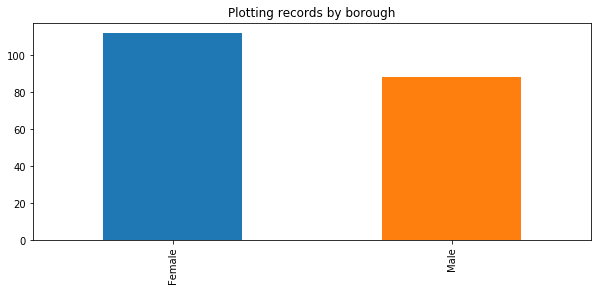

In [6]:
data['Gender'].value_counts().plot(kind='bar', title='Plotting records by borough', figsize=(10, 4),align='center')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


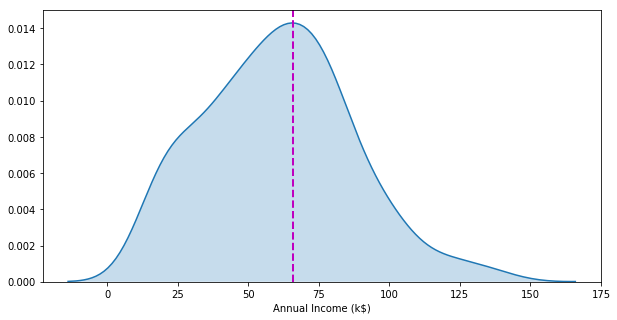

In [29]:
fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(data['Annual Income (k$)'],
             hist=False,
             kde_kws={'shade':True},
            ax = ax)
ax.axvline(x= 66, color='m', linestyle='--', linewidth=2)

Text(0, 0.5, 'Spedning Score')

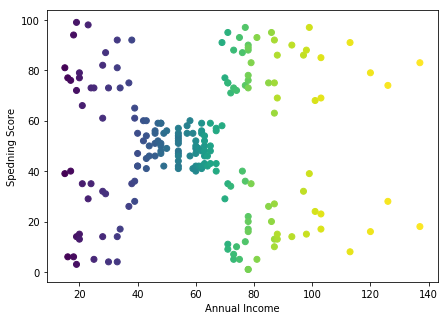

In [18]:
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(data["Annual Income (k$)"], data["Spending Score (1-100)"], c=data.index)
ax.set_xlabel("Annual Income")
ax.set_ylabel('Spedning Score')

In [30]:
gender = pd.get_dummies(data['Gender'])

In [32]:
gender = gender['Male']

In [33]:
data = pd.concat((data,gender),axis=1)

In [36]:
data.drop(['Gender'],axis=1,inplace=True)

In [37]:
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [66]:
y = data['Spending Score (1-100)'].values
X = data[['Age','Annual Income (k$)','Male']].values

In [67]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [68]:
kmeans = KMeans(n_clusters=3)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [70]:
kmeans.fit(X_train,y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [71]:
y_pred = kmeans.predict(X_test)

In [72]:
print(kmeans.labels_)

[1 2 1 0 1 1 1 1 1 0 2 0 2 1 0 0 1 1 0 2 1 1 2 2 2 0 2 2 1 2 1 0 1 0 1 1 0
 1 0 0 0 1 1 1 0 1 1 1 1 2 1 0 0 2 2 0 0 1 1 2 0 1 0 1 1 1 1 2 1 0 1 0 2 0
 1 1 1 0 1 0 0 2 1 1 0 2 1 1 0 2 1 1 0 1 0 0 1 2 0 2 0 1 0 0 1 1 2 1 1 1 1
 0 0 0 1 0 2 1 1 1 1 1 0 2 1 0 1 0 2 2 1 0 1 1 1 0 0 1 0 1]


In [77]:
clusters = kmeans.fit_predict(X)

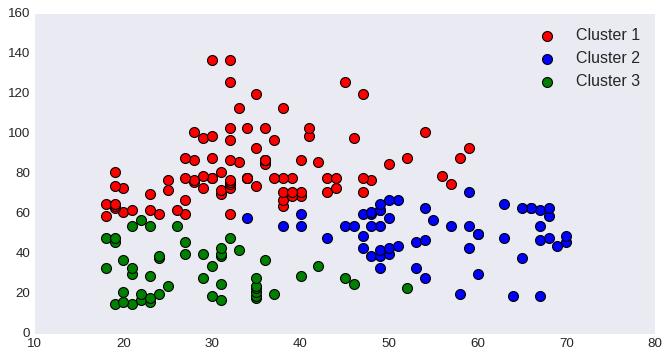

In [96]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(X[clusters == 0, 0], X[clusters == 0, 1], s = 80, c = 'Red')
ax.scatter(X[clusters == 1, 0], X[clusters == 1, 1], s = 80, c = 'Blue')
ax.scatter(X[clusters == 2, 0], X[clusters == 2, 1], s = 80, c = 'Green')
ax.legend(['Cluster 1','Cluster 2','Cluster 3'])